<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Selection-bias-lab-experiments" data-toc-modified-id="Selection-bias-lab-experiments-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Selection bias lab experiments</a></span><ul class="toc-item"><li><span><a href="#Response-distributions" data-toc-modified-id="Response-distributions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Response distributions</a></span></li></ul></li></ul></div>

## Lab Experiment Demographics
From the on-line sample of 81 Berlin participants we sent two emails:
1. Email with general inquiry, listing how long the session will be (2 hrs) and how much will they be paid (25-31 eur)
2. If they successfully answered to the first one another email was sent with details of the study (electrical shocks)

In [1]:
from groo.groo import get_root
root_dir = get_root(".root_dir_covid")

import pandas as pd
import ptitprince as pt
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
from scipy import stats

In [3]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

In [4]:
## Load email response data 
em_data = pd.read_csv(os.path.join(root_dir, "data","email_response_data.csv"))
em_data = em_data.set_index('subID', drop=False)

## Load status and the date of participation
#status = pd.read_csv(os.path.join(root_dir,"data", "task_data", "visit1","status_date.csv"))
#status = status.set_index('subID')
#em_data = em_data.join(status)


## Load lab ID and prolific ID link db
link_db = pd.read_csv(os.path.join(root_dir, "data", "berlin_lab_participants.csv"))
link_db = link_db.loc[:,link_db.columns.intersection(['ID', 'subID'])]
link_db = link_db.set_index('subID')

## Load pooled anxiety data 
an_data = pd.read_csv(os.path.join(root_dir,"output","questionnaires","pooled_anxiety.csv"))
an_data.index = an_data.pid

## Load covid-related responses from session 12
s12_data = pd.read_csv(os.path.join(root_dir, "data", "session15", "clean_dataset_reduced.csv"))
s12_data.index = s12_data.PROLIFICID
s12_data = s12_data.loc[s12_data.GROUP=='BE',:]


#### merge data to one data set 
data = em_data.join(link_db).set_index('ID',drop=False)
data = data.join(an_data).join(s12_data)

## adjust data 
data.email2= data.email2.replace({8:0})
data.email2= data.email2.replace({0:"No", 1: "Yes"})
data.email1= data.email1.replace({2:0})
data.email1= data.email1.replace({0: "No", 1: "Yes"})

data.to_csv(os.path.join(root_dir, "output", "selection_bias_data.csv"))

In [5]:
data

subID email1 email1_date email2 email2_date  \
ID                                                                     
5e99fbca965d4307124a67a5  ct01     No         NaN    NaN         NaN   
5e9dd9917fca8614c3ff4df0  ct02    Yes  23/09/2020     No         NaN   
5ea2ac2e9a49751cf0dee644  ct03    Yes  02/10/2020    Yes  06/10/2020   
5ea84aca3297e825a9d92aa5  ct04     No         NaN    NaN         NaN   
5e9acaa1c68a311659a65579  ct05     No         NaN    NaN         NaN   
...                        ...    ...         ...    ...         ...   
5ea93fc2083ea50008817466  ct77    Yes  26/09/2020    Yes  01/10/2020   
5eaa84cc9a2383000a4bb46e  ct78    Yes  22/09/2020    Yes  23/09/2020   
5e9f28299286a70a21369a87  ct79     No         NaN    NaN         NaN   
5e9e959c16e196252ffb5266  ct80    Yes  02/10/2020     No         NaN   
5ea9bb87b6145a0edc839cc2  ct81    Yes  23/09/2020     No         NaN   

                                                ID                Unnamed: 0  \
ID                                                                             
5e99fbca965d4307124a67a5  5e99fbca965d4307124a67a5  5e99fbca965d4307124a67a5   
5e9dd9917fca8614c3ff4df0  5e9dd9917fca8614c3ff4df0  5e9dd9917fca8614c3ff4df0   
5ea2ac2e9a49751cf0dee644  5ea2ac2e9a49751cf0dee644  5ea2ac2e9a49751cf0dee644   
5ea84aca3297e825a9d92aa5  5ea84aca3297e825a9d92aa5  5ea84aca3297e825a9d92aa5   
5e9acaa1c68a311659a65579  5e9acaa1c68a311659a65579  5e9acaa1c68a311659a65579   
...                                            ...                       ...   
5ea93fc2083ea50008817466  5ea93fc2083ea50008817466  5ea93fc2083ea50008817466   
5eaa84cc9a2383000a4bb46e  5eaa84cc9a2383000a4bb46e  5eaa84cc9a2383000a4bb46e   
5e9f28299286a70a21369a87  5e9f28299286a70a21369a87  5e9f28299286a70a21369a87   
5e9e959c16e196252ffb5266  5e9e959c16e196252ffb5266  5e9e959c16e196252ffb5266   
5ea9bb87b6145a0edc839cc2  5ea9bb87b6145a0edc839cc2  5ea9bb87b6145a0edc839cc2   

                          ta_s1  ta_s8  ta_overall  ...  q6_media_valence  \
ID                                                  ...                     
5e99fbca965d4307124a67a5     37   29.0        33.0  ...               NaN   
5e9dd9917fca8614c3ff4df0     39   37.0        38.0  ...               NaN   
5ea2ac2e9a49751cf0dee644     37   30.0        33.5  ...               NaN   
5ea84aca3297e825a9d92aa5     44   43.0        43.5  ...               NaN   
5e9acaa1c68a311659a65579     47   38.0        42.5  ...               NaN   
...                         ...    ...         ...  ...               ...   
5ea93fc2083ea50008817466     36   37.0        36.5  ...               NaN   
5eaa84cc9a2383000a4bb46e     37   34.0        35.5  ...               NaN   
5e9f28299286a70a21369a87     34   35.0        34.5  ...               NaN   
5e9e959c16e196252ffb5266     45   30.0        37.5  ...               NaN   
5ea9bb87b6145a0edc839cc2     30   39.0        34.5  ...               NaN   

                          covid_worry  covid_end_est stai_ta stai_sa  \
ID                                                                     
5e99fbca965d4307124a67a5          NaN            NaN     NaN     NaN   
5e9dd9917fca8614c3ff4df0          NaN            NaN     NaN     NaN   
5ea2ac2e9a49751cf0dee644          NaN            NaN     NaN     NaN   
5ea84aca3297e825a9d92aa5          NaN            NaN     NaN     NaN   
5e9acaa1c68a311659a65579          NaN            NaN     NaN     NaN   
...                               ...            ...     ...     ...   
5ea93fc2083ea50008817466          NaN            NaN     NaN     NaN   
5eaa84cc9a2383000a4bb46e          NaN            NaN     NaN     NaN   
5e9f28299286a70a21369a87          NaN            NaN     NaN     NaN   
5e9e959c16e196252ffb5266          NaN            NaN     NaN     NaN   
5ea9bb87b6145a0edc839cc2          NaN            NaN     NaN     NaN   

                         sticsa_ta  sticsa_sa bdi  cat  PROLIFICID.1  
ID                                   

### Age and Gender 

In [6]:
mpl.rcParams['figure.figsize'] = 6,5
mpl.rcParams['font.size'] = 14

sns.violinplot(x = 'sr_gender', y = 'sr_age', data = data, palette = 'mako')
sns.set_style("darkgrid")
g = sns.stripplot(x = 'sr_gender', y = 'sr_age', data = data, palette = 'mako', size = 2, jitter = True )
ax=sns.pointplot(x='sr_gender', y="sr_age", data=data, dodge=.532, join=False, palette='mako', markers="d", scale=.75, ci=68, alpha = [0.1, 0.3]);
for violin, alpha in zip(ax.collections[::2], [0.2,0.2]):
    violin.set_alpha(alpha)
    
# replace labels
plt.ylabel("Age");
plt.xlabel("Sex");

# set title 
ttl = ax.set_title("Age and Sex Distributions", fontsize = "large")
ttl.set_position([.5, 1.05])

ValueError: min() arg is an empty sequence

### STAI trait/state  distributions and correlation

#### Overall distribution

STAI trait anxiety
STAI state anxiety
STICSA trait anxiety
STICSA state anxiety
BDI
Catastophizing


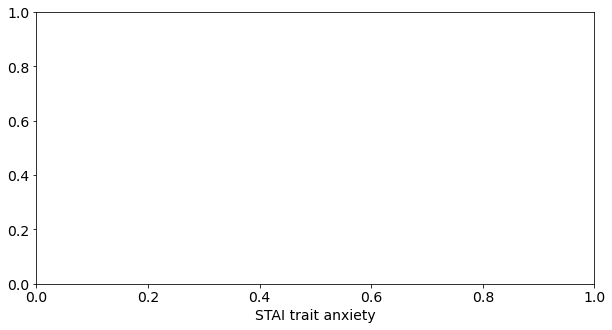

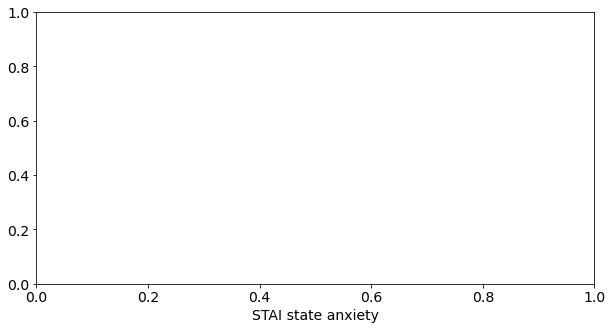

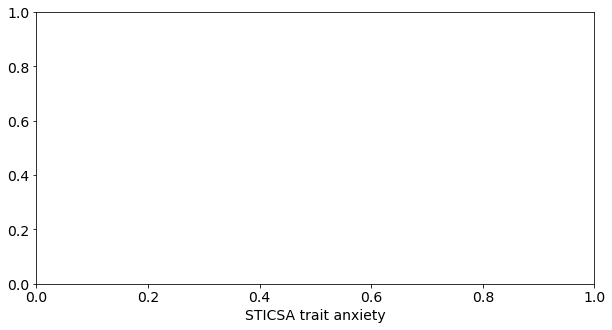

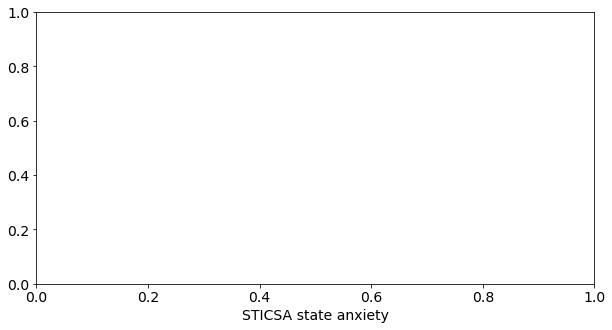

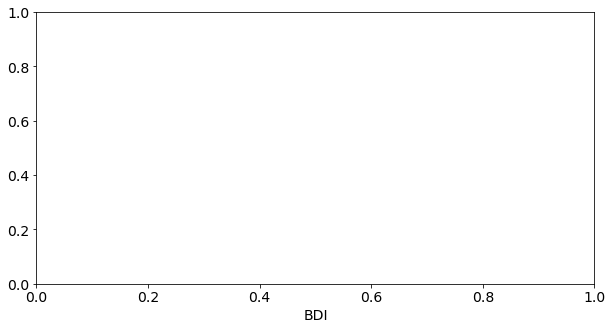

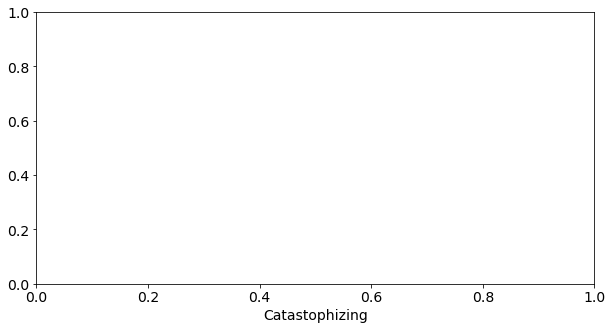

In [7]:
ivs = ["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat"]; 
#ivs = ['ta_overall']
labels = ['STAI trait anxiety', 'STAI state anxiety', 'STICSA trait anxiety', 'STICSA state anxiety', 'BDI', 'Catastophizing']

for (v,l) in zip(ivs, labels):
    print(l)
    fig, axs = plt.subplots(ncols=1, figsize=(10,5))
    sns.histplot(data=data, x=v, bins=12, stat='density', kde=True, element="step",
                color=sns.color_palette("rocket")[2])
    axs.set_xlabel(l)

#### Cross correlations and distributions

In [ ]:
sdf = data.loc[:,["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat"]]
g = sns.pairplot(sdf, corner=True, diag_kind="kde", kind="reg")
plt.subplots_adjust(top=0.9)

### Cross Correlations

In [ ]:
df = data.loc[:,["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat"]]

In [ ]:
from scipy.stats import pearsonr

In [ ]:
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

In [ ]:
mpl.rcParams['figure.figsize'] = 14,5
mpl.rcParams['font.size'] = 14
sns.heatmap(rho, cmap = 'coolwarm', linecolor = 'black', linewidth = 1, annot = True)

### Summary Table

In [ ]:
 import xlsxwriter

In [ ]:
dec = 3 #number of decimal points

header = pd.MultiIndex.from_product([['Male','Female'],
                                     ['M', '%', 'SD']])
summary = pd.DataFrame([['',str(round((data['sr_gender'][data['sr_gender'] == 'M'].count() / data['sr_gender'].count()) * 100,2)) + ' %','','',str(round((data['sr_gender'][data['sr_gender'] == 'F'].count() / data['sr_gender'].count()) * 100,2)) + ' %',''],
                   [round(data['sr_age'][data['sr_gender'] == 'M'].mean(),2),'',round(data['sr_age'][data['sr_gender'] == 'M'].std(),2),round(data['sr_age'][data['sr_gender'] == 'F'].mean(),2),'',round(data['sr_age'][data['sr_gender'] == 'F'].std(),2)],
                   [round(data['stai_ta'][data['sr_gender'] == 'M'].mean(),2),'',round(data['stai_ta'][data['sr_gender'] == 'M'].std(),2),round(data['stai_ta'][data['sr_gender'] == 'F'].mean(),2),'',round(data['stai_ta'][data['sr_gender'] == 'F'].std(),2)],
                   [round(data['stai_sa'][data['sr_gender'] == 'M'].mean(),2),'',round(data['stai_sa'][data['sr_gender'] == 'M'].std(),2),round(data['stai_sa'][data['sr_gender'] == 'F'].mean(),2),'',round(data['stai_sa'][data['sr_gender'] == 'F'].std(),2)],
                   [round(data['sticsa_ta'][data['sr_gender'] == 'M'].mean(),2),'',round(data['sticsa_ta'][data['sr_gender'] == 'M'].std(),2),round(data['sticsa_ta'][data['sr_gender'] == 'F'].mean(),2),'',round(data['sticsa_ta'][data['sr_gender'] == 'F'].std(),2)],
                   [round(data['sticsa_sa'][data['sr_gender'] == 'M'].mean(),2),'',round(data['sticsa_sa'][data['sr_gender'] == 'M'].std(),2),round(data['sticsa_sa'][data['sr_gender'] == 'F'].mean(),2),'',round(data['sticsa_sa'][data['sr_gender'] == 'F'].std(),2)],
                   [round(data['bdi'][data['sr_gender'] == 'M'].mean(),2),'',round(data['bdi'][data['sr_gender'] == 'M'].std(),2),round(data['bdi'][data['sr_gender'] == 'F'].mean(),2),'',round(data['bdi'][data['sr_gender'] == 'F'].std(),2)],
                   [round(data['cat'][data['sr_gender'] == 'M'].mean(),2),'',round(data['cat'][data['sr_gender'] == 'M'].std(),2),round(data['cat'][data['sr_gender'] == 'F'].mean(),2),'',round(data['cat'][data['sr_gender'] == 'F'].std(),2)]], 
                  index=['Gender', 'Age', 'Trait Anxiety (STAIT)', 'State Anxiety (STAIS)', 'Trait Cognitive and Somatic Anxiety (STICSAT)', 'State Cognitive and Somatic Anxiety (STICSAS)', 'Beck Depression Inventory (BDI)', 'Catastrophizing'], 
                  columns=header)
header1 = pd.MultiIndex.from_product([[''],
                                     ['P']])
df1 = pd.DataFrame([[''],
                    [round(stats.ttest_ind(data['sr_age'][data['sr_gender'] == 'F'], data['sr_age'][data['sr_gender'] == 'M'])[1], dec)],
                    [round(stats.ttest_ind(data['stai_ta'][data['sr_gender'] == 'F'], data['stai_ta'][data['sr_gender'] == 'M'])[1], dec)],
                    [round(stats.ttest_ind(data['stai_sa'][data['sr_gender'] == 'F'], data['stai_sa'][data['sr_gender'] == 'M'])[1], dec)],
                    [round(stats.ttest_ind(data['sticsa_ta'][data['sr_gender'] == 'F'], data['sticsa_ta'][data['sr_gender'] == 'M'])[1], dec)],
                    [round(stats.ttest_ind(data['sticsa_sa'][data['sr_gender'] == 'F'], data['sticsa_sa'][data['sr_gender'] == 'M'])[1], dec)],
                    [round(stats.ttest_ind(data['bdi'][data['sr_gender'] == 'F'], data['bdi'][data['sr_gender'] == 'M'])[1], dec)],
                    [round(stats.ttest_ind(data['cat'][data['sr_gender'] == 'F'], data['cat'][data['sr_gender'] == 'M'])[1], dec)]],
                   index=['Gender', 'Age', 'Trait Anxiety (STAIT)', 'State Anxiety (STAIS)', 'Trait Cognitive and Somatic Anxiety (STICSAT)', 'State Cognitive and Somatic Anxiety (STICSAS)', 'Beck Depression Inventory (BDI)', 'Catastrophizing'], columns=header1)

visit1_lab_demographics = summary.join(df1)

visit1_lab_demographics.to_excel('output/visit1_lab_demographics.xlsx')


In [ ]:
visit1_lab_demographics

#### Response distributions

- histograms/density plots are normalized per category

In [ ]:
(sns.color_palette("rocket"))

In [ ]:
ivs = ['ta_overall', 'stta_overall', 'sr_age',
       'q6_media_valence', 'covid_worry', 'covid_avoidance_beh',
       'covid_spec_anxiety', 'covid_prob_estimates']; 
#ivs = ['ta_overall']
labels = ['STAI trait anxiety', 'STICSA trait', 'Age', 
         'Media valence', 'COVID worry', 'Avoidance behaviour', 
         'COVID-spec anxiety', 'COVID prob estimates']

em2 = data.email1.value_counts()[0]


for (v,l) in zip(ivs, labels):
    print(l)
    fig, axs = plt.subplots(ncols=3, figsize=(14,5))
    sns.histplot(data=data, x=v, bins=12, ax=axs[0], stat='density', kde=True, element="step",
                color=sns.color_palette("rocket")[2])
    axs[0].set_title('Overall distribution')
    axs[0].set_xlabel(l)
    
    sns.histplot(data=data, x=v, bins=12, hue='email1', ax=axs[1], stat='probability', kde=True, 
                 kde_kws=dict(bw_method='scott', bw_adjust=0.7),
                 alpha=0.35, element="step",
                palette=list( sns.color_palette("rocket")[i] for i in [1,4] ), common_norm=False)
    axs[1].set_title('General willingness to participate\n (n=81)')
    axs[1].set_xlabel(l)
        
    
    sns.histplot(data=data, x=v, bins=12, hue='email2', ax=axs[2], stat='probability', kde=True, 
                kde_kws=dict(bw_method='scott', bw_adjust=0.6), element="step",
                palette=list( sns.color_palette("rocket")[i] for i in [1,4] ), common_norm=False)
    axs[2].set_title('Willingness to participate in a shock study \n (n='+str(em2)+')')
    axs[2].set_xlabel(l)
    #sns.regplot(x='value', y='wage', data=df_melt, ax=axs[1])
    #sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])


In [ ]:
#ivs = ['ta_overall']
#labels=  ['trait anxiety']
cmap = sns.color_palette("magma", as_cmap=True)

for (v,l) in zip(ivs, labels):
    fig, axs = plt.subplots(ncols=2, figsize=(14,5))
    
    td=data.loc[:,data.columns.intersection(["email1", v])].dropna()
    t,p = sp.stats.ranksums(td[v].loc[td.email1=="No"], td[v].loc[td.email1=="Yes"]);
    print(p)
    ax = pt.RainCloud(x = 'email1', y = v, 
                  ax=axs[0],
                  data = data, 
                  width_viol = .8,
                  width_box = .4,
                  orient = 'h',
                  palette=list([cmap(60), cmap(180)] ),
                  alpha=0.95,
                  move = .0)
    axs[0].set_title('Email 1: Are you willing to take part in an in-lab study?\n (before learning about shocks, n=81)',
                    fontsize=16)
    axs[0].set_xlabel(l, fontsize=16)
    axs[0].set_ylabel('')
    axs[0].set_yticklabels(['No', 'Yes'], fontsize=16)
    
    ########
    ax = pt.RainCloud(x = 'email2', y = v, 
                  ax=axs[1],
                  data = data, 
                  width_viol = .8,
                  width_box = .4,
                  orient = 'h',
                  palette=list([cmap(160), cmap(200)] ),
                  alpha=0.95,
                  move = .0)
    axs[1].set_title('Email 2: The study involves electrical stimuli, \ndo you still want to take part? (n='+str(em2)+')',
                     fontsize=16)
    #plt.xticks(np.arange(20,80,10))
    axs[1].set_xlabel(l, fontsize=16)
    axs[1].set_ylabel('')
    axs[1].set_yticklabels(['No', 'Yes'], fontsize=16)
    plt.subplots_adjust(hspace=6)
    plt.savefig(os.path.join(root_dir, "output", "figures", "selection_bias", v+".pdf")) 
    plt.savefig(os.path.join(root_dir, "output", "figures", "selection_bias", v+".png")) 



In [ ]:
    sns.histplot(data=data, x=v, bins=12, ax=axs[0], stat='density', kde=True, element="step",
                color=sns.color_palette("rocket")[2])
    axs[0].set_title('Overall distribution')
    axs[0].set_xlabel(l)
    
    sns.histplot(data=data, x=v, bins=12, hue='email1', ax=axs[1], stat='probability', kde=True, 
                 kde_kws=dict(bw_method='scott', bw_adjust=0.7),
                  element="step",
                palette=list( sns.color_palette("rocket")[i] for i in [1,4] ), common_norm=False)
    